In [6]:
!pip install -q tensorflow==2.4.1

     |████████████████████████████████| 394.3MB 17kB/s 
     |████████████████████████████████| 3.8MB 24.3MB/s 
     |████████████████████████████████| 2.9MB 33.1MB/s 
     |████████████████████████████████| 471kB 48.3MB/s 


**Abhishek Kumar Project On MNIST DataSet**

In [8]:
import tensorflow as tf
import cirq
import sympy
import numpy as np
import seaborn as sns
import collections
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11493376/11490434 [==============================] - 0s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000


In [10]:
!pip install -q tensorflow-quantum

In [11]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [12]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


True


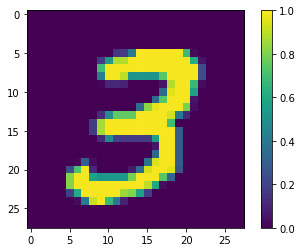

In [13]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

In [14]:
x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

True


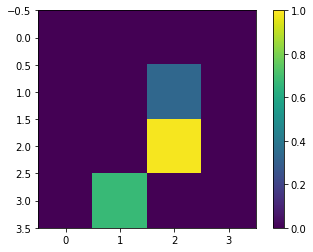

In [15]:
print(y_train[0])

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

In [16]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x,y in zip(xs,ys):
       orig_x[tuple(x.flatten())] = x
       mapping[tuple(x.flatten())].add(y)

    new_x = []
    new_y = []
    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          # Throw out images that match more than one label.
          pass

    num_uniq_3 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))

    return np.array(new_x), np.array(new_y)

In [17]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338


In [18]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

In [19]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


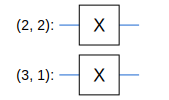

In [20]:
SVGCircuit(x_train_circ[0])


In [21]:
bin_img = x_train_bin[0,:,:,0]
indices = np.array(np.where(bin_img)).T
indices

array([[2, 2],
       [3, 1]])

In [30]:
x_train_circ

[(2, 2): ───X───

(3, 1): ───X───,
 (1, 2): ───X───

(2, 2): ───X───,
 (3, 1): ───X───,
 (0, 2): ───X───

(1, 1): ───X───

(2, 2): ───X───,
 (0, 2): ───X───

(2, 1): ───X───,
 (1, 2): ───X───

(2, 2): ───X───

(3, 1): ───X───,
 (1, 0): ───X───,
 (0, 2): ───X───

(2, 1): ───X───,
 (2, 1): ───X───

(2, 2): ───X───,
 (2, 1): ───X───,
 (2, 2): ───X───,
 (1, 2): ───X───

(2, 2): ───X───

(3, 1): ───X───,
 (2, 1): ───X───,
 (0, 2): ───X───

(2, 1): ───X───,
 (2, 1): ───X───,
 (2, 2): ───X───

(3, 1): ───X───,
 (0, 2): ───X───,
 (3, 2): ───X───,
 (0, 2): ───X───

(1, 1): ───X───

(2, 1): ───X───

(2, 2): ───X───,
 (0, 2): ───X───

(2, 1): ───X───,
 (2, 2): ───X───

(3, 1): ───X───,
 (1, 1): ───X───

(2, 1): ───X───,
 (1, 2): ───X───

(2, 2): ───X───,
 (3, 1): ───X───,
 (0, 2): ───X───

(1, 1): ───X───

(2, 1): ───X───

(2, 2): ───X───,
 (2, 1): ───X───

(2, 2): ───X───,
 (1, 2): ───X───

(2, 2): ───X───,
 (1, 2): ───X───

(2, 2): ───X───,
 ,
 (0, 2): ───X───

(2, 1): ───X───

(2, 2): ───X───,

In [32]:
x_train_tfcirc = tf.convert_to_tensor(x_train)
x_test_tfcirc = tf.convert_to_tensor(x_test)

In [33]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

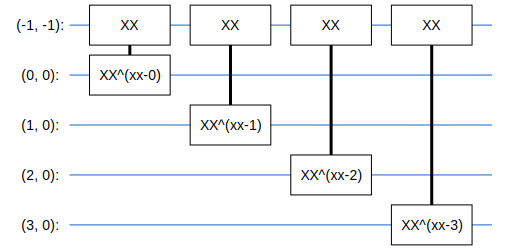

In [34]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

In [36]:
def create_quantum_model():
    data_qubits = cirq.GridQubit.rect(4, 4) 
    readout = cirq.GridQubit(-1, -1)         
    circuit = cirq.Circuit()

    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [37]:
model_circuit, model_readout = create_quantum_model()


In [44]:
model_circuit

(-1, -1): ───X───H───XX───────────XX───────────XX───────────XX───────────XX───────────XX───────────XX───────────XX───────────XX───────────XX───────────XX────────────XX────────────XX────────────XX────────────XX────────────XX────────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ───────────ZZ────────────ZZ────────────ZZ────────────ZZ────────────ZZ────────────ZZ────────────H───
                     │            │            │            │            │            │            │            │            │            │            │             │             │             │             │             │             │            │            │            │            │            │            │            │            │            │            │             │             │             │             │             │
(0, 0): ─────────────XX^(xx1-0)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────ZZ^(zz1-0)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────────
                                  │            │            │            │            │            │            │            │            │            │             │             │             │             │             │                          │            │            │            │            │            │            │            │            │            │             │             │             │             │             │
(0, 1): ──────────────────────────XX^(xx1-1)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────────────────ZZ^(zz1-1)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────────
                                               │            │            │            │            │            │            │            │            │             │             │             │             │             │                                       │            │            │            │            │            │            │            │            │             │             │             │             │             │
(0, 2): ───────────────────────────────────────XX^(xx1-2)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────────────────────────────────ZZ^(zz1-2)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────────
                                                            │            │            │            │            │            │            │            │             │             │             │             │             │                                                    │            │            │            │            │            │            │            │             │             │             │             │             │
(0, 3): ────────────────────────────────────────────────────XX^(xx1-3)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼────────────────────────────────────────────────────ZZ^(zz1-3)───┼────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼

In [45]:
model_readout

Z((-1, -1))

In [42]:
def create_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [46]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

Epoch 1/10
95/95 [==============================] - 31s 322ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0018 - val_accuracy: 0.9990
Epoch 2/10
95/95 [==============================] - 30s 320ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 4.2779e-04 - val_accuracy: 1.0000
Epoch 3/10
95/95 [==============================] - 30s 318ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 9.5893e-04 - val_accuracy: 1.0000
Epoch 4/10
95/95 [==============================] - 31s 321ms/step - loss: 7.9442e-04 - accuracy: 0.9998 - val_loss: 4.1540e-04 - val_accuracy: 1.0000
Epoch 5/10
95/95 [==============================] - 31s 323ms/step - loss: 2.0630e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 6/10
95/95 [==============================] - 31s 323ms/step - loss: 1.9885e-04 - accuracy: 0.9999 - val_loss: 4.5434e-04 - val_accuracy: 1.0000
Epoch 7/10
95/95 [==============================] - 31s 324ms/step - loss: 9.5994e-05 - accuracy: 1.0000 - val_los

In [49]:
history = model.fit(x_train, y_train,batch_size=128,epochs=10,validation_split=0.2,verbose=2, validation_data=(x_test, y_test))


Epoch 1/10
76/76 - 24s - loss: 3.9097e-05 - accuracy: 1.0000 - val_loss: 7.3347e-05 - val_accuracy: 1.0000
Epoch 2/10
76/76 - 24s - loss: 3.4759e-05 - accuracy: 1.0000 - val_loss: 2.6507e-06 - val_accuracy: 1.0000
Epoch 3/10
76/76 - 24s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 3.0218e-04 - val_accuracy: 1.0000
Epoch 4/10
76/76 - 24s - loss: 7.1225e-04 - accuracy: 0.9999 - val_loss: 4.5519e-05 - val_accuracy: 1.0000
Epoch 5/10
76/76 - 24s - loss: 4.2006e-05 - accuracy: 1.0000 - val_loss: 2.4728e-05 - val_accuracy: 1.0000
Epoch 6/10
76/76 - 24s - loss: 1.9779e-05 - accuracy: 1.0000 - val_loss: 1.3298e-05 - val_accuracy: 1.0000
Epoch 7/10
76/76 - 24s - loss: 3.9649e-04 - accuracy: 0.9998 - val_loss: 1.9242e-05 - val_accuracy: 1.0000
Epoch 8/10
76/76 - 24s - loss: 1.2563e-04 - accuracy: 0.9999 - val_loss: 7.2660e-06 - val_accuracy: 1.0000
Epoch 9/10
76/76 - 24s - loss: 8.4815e-04 - accuracy: 0.9997 - val_loss: 1.1813e-04 - val_accuracy: 1.0000
Epoch 10/10
76/76 - 24s - loss: 4.1852e-0

In [50]:
yhat = model.predict_classes(x_test)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  '  (e.g. if it uses a `softmax` last-layer activation).'


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, yhat)


1.0

In [54]:
accuracy_score(y_train, model.predict_classes(x_train))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  '  (e.g. if it uses a `softmax` last-layer activation).'


1.0

In [55]:
from sklearn.metrics import f1_score
f1_score(yhat,y_test)

1.0

In [56]:
f1_score(model.predict_classes(x_train),y_train)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  '  (e.g. if it uses a `softmax` last-layer activation).'


1.0

In [57]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [58]:
import matplotlib.pyplot as plt


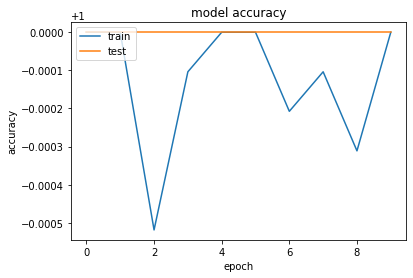

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

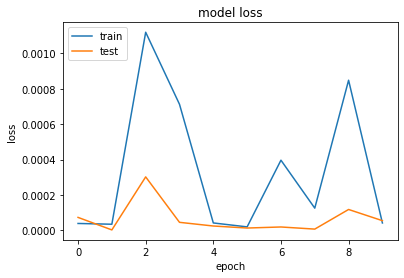

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()